<div align="center">
    <img src="https://upload.wikimedia.org/wikipedia/commons/a/a3/University_of_Isfahan-Logo.png" width="100" height="100">
</div>

<div dir="rtl" align="center">
  <h1> </h1>
  <h4> Isfahan University - Computer Science </h4>
  <h4 style="color:#3399FF"> Machine Learning </h4>
  <h5> May, 2024 </h5>
  <hr>
  <h2 style="color:#006633"> <strong>HW2: Linear Model</strong> </h2>
  <hr>
</div>

<h3> Your Student ID:  </h3>
<h3> Your Name:  </h3>
<hr>

### import libraries

In [5]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.datasets import make_regression
from sklearn.ensemble import StackingRegressor
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from matplotlib import pyplot as plt

In [2]:
STUDENT_ID = 48  # TODO: must be your student id.

X, y = make_regression(
    n_samples=10_000,
    n_features=10,
    n_informative=1,
    n_targets=1,
    noise=30,
    random_state=STUDENT_ID
)

df = pd.DataFrame(X, columns=[f"f{i}" for i in range(1, 11)])
df['target'] = y

df.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,target
0,0.093437,-1.023878,-0.174145,1.291561,0.250875,0.244722,0.906176,-0.759991,0.638234,1.422094,-8.862904
1,0.160029,1.933097,1.310673,0.775621,-0.249640,0.052258,-1.329413,0.219810,-1.114524,0.040995,-5.851703
2,-1.035896,-0.005947,-1.945261,0.054846,-1.285329,-0.924008,-0.263393,-0.914154,-0.596678,0.180795,-101.532753
3,0.968584,-0.192934,1.340943,0.214768,2.060249,-0.670812,-0.194536,-1.277876,0.765732,0.576020,169.801684
4,0.927753,-0.234350,0.677828,0.941264,0.750593,1.735322,-0.141508,-0.035884,-1.315085,-2.677045,21.973263


### Questions

<strong style="color:red "> Q1. </strong> Split the dataset for testing and training, so that `20%` is dedicated to the test data. Consider the following point:
- set shuffle to `False` 
- random state: your `student_id`

In [95]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48, shuffle=False)

<strong style="color:red "> Q2. </strong> `fit` and `predict` the dataset by using `LinearRegression` model.<ln>

In [96]:
reg_model = LinearRegression()

_ = reg_model.fit(x_train, y_train)

reg_pred = reg_model.predict(x_test)

<strong style="color:red "> Q3. </strong> select `three` regression metrics as desired, then `evaluate` the model output with them.<ln>

In [97]:
print("r2\t", r2_score(y_test, reg_pred))

print("MAE\t", mean_absolute_error(y_test, reg_pred))

print("MSE\t", mean_squared_error(y_test, reg_pred))

r2	 0.885852451929586
MAE	 23.28441698569419
MSE	 863.8507842543992


<strong style="color:red "> Q4. </strong> plot scatter of `predict` and `y_test`. Consider the following points: <ln>
- set figsize to (4, 4)
- set `x` to predict
- set `y` to y_test
- set `alpha` to 0.5
- set title to "predict vs. actual"
- set xlabel to "predict"
- set ylabel to "actual"

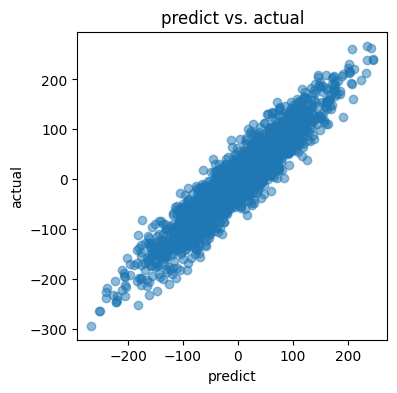

In [98]:
fig, ax = plt.subplots(figsize=(4, 4))

_ = ax.scatter(x=reg_pred, y=y_test, alpha=0.5)

_ = ax.set_title("predict vs. actual")
_ = ax.set_xlabel("predict")
_ = ax.set_ylabel("actual")

<strong style="color:red "> Q5. </strong> plot scatter of `predict` and `y_test - predict` as `residual`. Consider the following points: <ln>
- set figsize to (4, 4)
- set `x` to predict
- set `y` to y_test - predict
- set `alpha` to 0.5
- set title to "predict vs. residual"
- set xlabel to "predict"
- set ylabel to "residual"


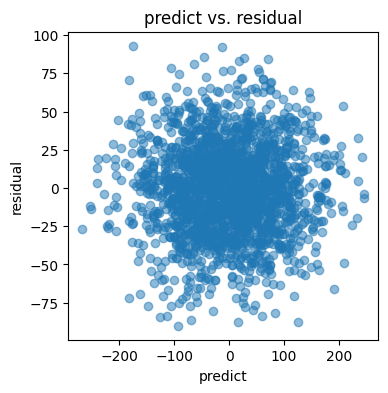

In [99]:
fig, ax = plt.subplots(figsize=(4, 4))

_ = ax.scatter(x=reg_pred, y=y_test-reg_pred, alpha=0.5)

_ = ax.set_title("predict vs. residual")
_ = ax.set_xlabel("predict")
_ = ax.set_ylabel("residual")

<strong style="color:red "> Q6. </strong> `MinMaxScaler` is a data normalization method that you can see how it works <a href="https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling">[here]</a>. Apply this method `just to all features` (don't apply to target) and then do the following steps again:

- split the dataset to train and test with `test_size = 20%`
- `train` and `test` model
- `re-evaluate` the model according to the `three` metrics you selected earlier.

In [103]:
min_max_scaler = MinMaxScaler()

new_X = min_max_scaler.fit_transform(X=X)

x_train, x_test, y_train, y_test = train_test_split(new_X, y, test_size=0.2, random_state=48, shuffle=False)

reg_model = LinearRegression()

_ = reg_model.fit(x_train, y_train)

reg_pred = reg_model.predict(x_test)

print("r2\t", r2_score(y_test, reg_pred))

print("MAE\t", mean_absolute_error(y_test, reg_pred))

print("MSE\t", mean_squared_error(y_test, reg_pred))

r2	 0.8858524519295862
MAE	 23.284416985694158
MSE	 863.8507842543972


<strong style="color:red "> Q7. </strong> Rewrite the process in the previous question using a `Pipeline`. Do not forget the following point:
- split the obtained dataset to train and test with `test_size = 20%`


**(hint: You can read this <a href="https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html"> `sklearn.pipeline.Pipeline` </a> link for more information.)**

In [129]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48, shuffle=False)

pipe = Pipeline([('min_max_scaler', MinMaxScaler()), ('linear_model', LinearRegression())])

_ = pipe.fit(x_train, y_train)

reg_pred = pipe.predict(x_test)

print("r2\t", r2_score(y_test, reg_pred))

print("MAE\t", mean_absolute_error(y_test, reg_pred))

print("MSE\t", mean_squared_error(y_test, reg_pred))

pipe

r2	 0.8858524519295863
MAE	 23.284416985694158
MSE	 863.8507842543971


Pipeline(steps=[('min_max_scaler', MinMaxScaler()),
                ('linear_model', LinearRegression())])

<strong style="color:red "> Q8. </strong> Normalize the data set once with `MinMaxScaler` and once with `StandardScaler`, then concatenate the results. Finally, the obtained dataset should have `20` features. Give the obtained result to a `LinearRegression` model and check again the `three` evaluation metrics that you specified above. Do not forget the following point:
- split the obtained dataset to train and test with `test_size = 20%`

**(hint: You can use class `sklearn.pipeline.FeatureUnion` for various processing and meetings.)**

In [132]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48, shuffle=False)

pipe_preprocessing = FeatureUnion([('std_scaler', StandardScaler()), ('min_max scaler', MinMaxScaler())])
pipe = Pipeline([('preprocessing', pipe_preprocessing), ('linear_regression', LinearRegression())])

_ = pipe.fit(x_train, y_train)

reg_pred = pipe.predict(x_test)

print("r2\t", r2_score(y_test, reg_pred))

print("MAE\t", mean_absolute_error(y_test, reg_pred))

print("MSE\t", mean_squared_error(y_test, reg_pred))

pipe

r2	 0.8858528793509806
MAE	 23.284373748809884
MSE	 863.8475495961595


Pipeline(steps=[('preprocessing',
                 FeatureUnion(transformer_list=[('std_scaler',
                                                 StandardScaler()),
                                                ('min_max scaler',
                                                 MinMaxScaler())])),
                ('linear_regression', LinearRegression())])

<strong style="color:red "> Q9. </strong> Repeat the normalization and concatenation of the previous step (Q8). Give the obtained dataset which has 20 features to algorithm `PCA`, such that the number of features is reduced from `20` to `4`. Algorithm `PCA` is a dimensionality reduction technique that you can read more about <a href="https://en.wikipedia.org/wiki/Principal_component_analysis"> [here] </a>. Do not forget the following point:
- split the obtained dataset to train and test with `test_size = 20%`

In [161]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48, shuffle=False)

pipe_preprocessing = FeatureUnion([('std_scaler', StandardScaler()), ('min_max scaler', MinMaxScaler())])
pipe_reduction = Pipeline([('preprocessing', pipe_preprocessing), ('pca', PCA(n_components=4))])
pipe = Pipeline([('reduction', pipe_reduction), ('linear_regression', LinearRegression())])

_ = pipe.fit(x_train, y_train)

reg_pred = pipe.predict(x_test)

print("r2\t", r2_score(y_test, reg_pred))

print("MAE\t", mean_absolute_error(y_test, reg_pred))

print("MSE\t", mean_squared_error(y_test, reg_pred))

pipe

r2	 0.2785479538829507
MAE	 59.168658940547445
MSE	 5459.836206518469


Pipeline(steps=[('reduction',
                 Pipeline(steps=[('preprocessing',
                                  FeatureUnion(transformer_list=[('std_scaler',
                                                                  StandardScaler()),
                                                                 ('min_max '
                                                                  'scaler',
                                                                  MinMaxScaler())])),
                                 ('pca', PCA(n_components=4))])),
                ('linear_regression', LinearRegression())])

<strong style="color:red "> Q10. </strong> We want to do the above process (Q9) for two `Lasso` and `Ridge` models and then give the results of each to another regressor model (s.t. `LinearRegression`) that predicts from the output of these two models. We call this method `ensemble`. This technique allows us to use the power of several models instead of one model. Do not forget the following point:
- split the obtained dataset for any section to train and test with `test_size = 20%`

**(hint: You can use class `sklearn.ensemble.StackingRegressor` for to stack regressions.)**

In [162]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48, shuffle=False)

pipe_preprocessing = FeatureUnion([('std_scaler', StandardScaler()), ('min_max scaler', MinMaxScaler())])
pipe_reduction = Pipeline([('preprocessing', pipe_preprocessing), ('pca', PCA(n_components=4))])

pipe_01 = Pipeline([('reduction', pipe_reduction), ('ridge', Ridge())])
pipe_02 = Pipeline([('reduction', pipe_reduction), ('lasso', Lasso())])

pipe = StackingRegressor([('ridge', pipe_01), ('lasso', pipe_02)], final_estimator=LinearRegression())

_ = pipe.fit(x_train, y_train)

reg_pred = pipe.predict(x_test)

print("r2\t", r2_score(y_test, reg_pred))

print("MAE\t", mean_absolute_error(y_test, reg_pred))

print("MSE\t", mean_squared_error(y_test, reg_pred))

pipe

r2	 0.2783681165685622
MAE	 59.18317978597309
MSE	 5461.197187176389


StackingRegressor(estimators=[('ridge',
                               Pipeline(steps=[('reduction',
                                                Pipeline(steps=[('preprocessing',
                                                                 FeatureUnion(transformer_list=[('std_scaler',
                                                                                                 StandardScaler()),
                                                                                                ('min_max '
                                                                                                 'scaler',
                                                                                                 MinMaxScaler())])),
                                                                ('pca',
                                                                 PCA(n_components=4))])),
                                               ('ridge', Ridge())])),
                              ('lasso',
                               Pipeline(steps=[('reduction',
                                                Pipeline(steps=[('preprocessing',
                                                                 FeatureUnion(transformer_list=[('std_scaler',
                                                                                                 StandardScaler()),
                                                                                                ('min_max '
                                                                                                 'scaler',
                                                                                                 MinMaxScaler())])),
                                                                ('pca',
                                                                 PCA(n_components=4))])),
                                               ('lasso', Lasso())]))],
                  final_estimator=LinearRegression())